In [64]:
import pandas as pd

# Load the dataset
file_name = "/content/netflix_titles.csv"
df = pd.read_csv(file_name)

# Display the first few rows of the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [63]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [47]:
df.listed_in

7       Dramas, Independent Movies, International Movies
8                           British TV Shows, Reality TV
9                                       Comedies, Dramas
12                          Dramas, International Movies
24       Comedies, International Movies, Romantic Movies
                              ...                       
8801             Dramas, International Movies, Thrillers
8802                      Cult Movies, Dramas, Thrillers
8804                             Comedies, Horror Movies
8805                  Children & Family Movies, Comedies
8806      Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 5332, dtype: object

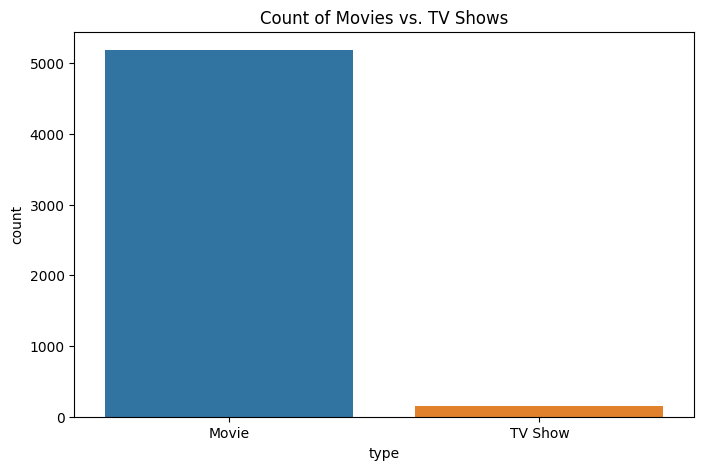

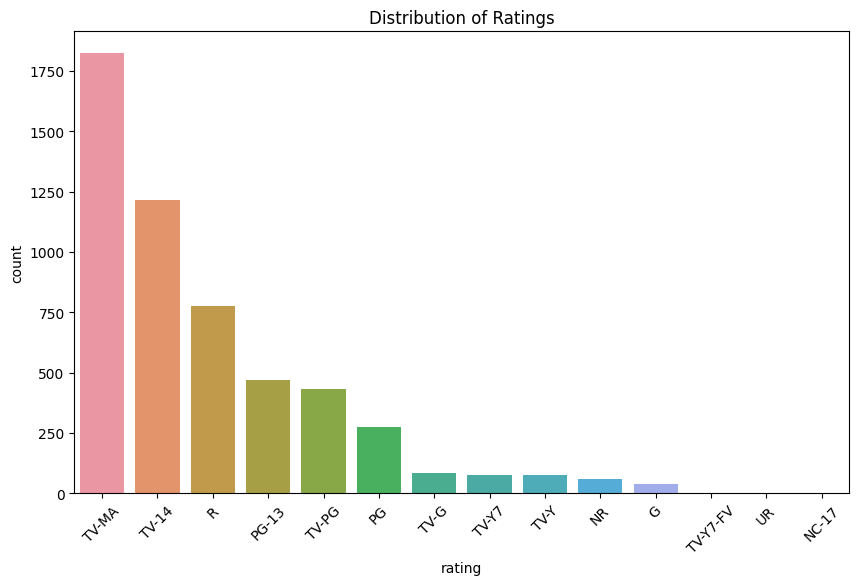

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of movies and TV shows
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df)
plt.title('Count of Movies vs. TV Shows')
plt.show()

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()


In [49]:
# Create a function to categorize content based on rating
def categorize_rating(rating):
    if rating in ['TV-Y', 'TV-Y7', 'TV-G']:
        return 'Kids'
    elif rating in ['TV-14', 'TV-PG']:
        return 'Teens'
    else:
        return 'Adults'

df['audience'] = df['rating'].apply(categorize_rating)

# Display the updated dataframe
df.head()


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description,audience
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,Teens
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Adults
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Adults
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,Teens


In [36]:
df.drop(["release_year"],axis=1,inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [43]:
df.dropna(inplace=True)

In [44]:
missing_values = df.isnull().sum()
print(missing_values)

show_id        0
type           0
title          0
director       0
cast           0
country        0
date_added     0
rating         0
duration       0
listed_in      0
description    0
dtype: int64


In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)